In [5]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [6]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [7]:
from   SV3.define_sample import define_sample

In [17]:
reachable = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_reachable_sv3_v0.1.fits')
reachable

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1462,526,5261462,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1462,526,5261462,1e+20

In [18]:
bright = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v0.1.fits')
bright

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,1.0504202,True,1.0099682
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.937166,115.9185,0.43463737,0.1699

Text(0.5, 0, '$r$')

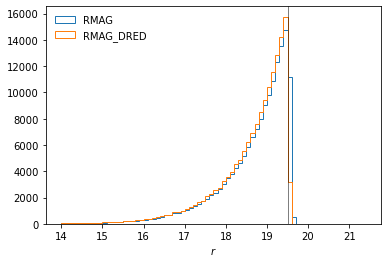

In [19]:
_ = pl.hist(bright['RMAG'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG')
_ = pl.hist(bright['RMAG_DRED'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG_DRED')

pl.legend(frameon=False, loc=2)
pl.axvline(19.5, lw=0.5, c='k')
pl.xlabel('$r$')

Text(0.5, 0, 'fiber $r$')

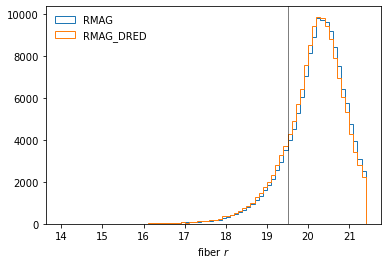

In [20]:
_ = pl.hist(bright['FIBER_RMAG'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG')
_ = pl.hist(bright['FIBER_RMAG_DRED'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG_DRED')

pl.legend(frameon=False, loc=2)

pl.axvline(19.5, lw=0.5, c='k')
pl.xlabel('fiber $r$')

In [13]:
# np.unique(bright['ZTILEID'])

In [21]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v0.1.fits')
derived

TARGETID,ROSETTE,BGS_Z_WEIGHT,VOLUME,MRH,ZMAX,IVMAX,VONVMAX
float64,float64,float64,float64,float64,float64,float64,float64
3.9627733927462344e+16,-1.0,1.0120848417282104,6557842.902912342,-19.881173918302483,0.21445029728502413,1.3821299406662422e-07,0.9063791022300773
3.962773392746358e+16,-1.0,1.0099681615829468,4388413.147925923,-20.70733488751636,0.29628868288639787,4.546607037932931e-08,0.1995239010371741
3.962773392746381e+16,-1.0,1.0021929740905762,4455176.688937193,-21.046547705446496,0.3332149454558418,3.0117479118558124e-08,0.13417869089855283
3.9627733927464616e+16,-1.0,1.0001806020736694,84719.66939856742,-19.680466316967664,0.19446983251551314,1.9232488257010465e-07,0.016293700468457566
3.962773392746479e+16,-1.0,1.0094077587127686,15168192.40685058,-20.737353369447934,0.29644961910733025,4.538002435275527e-08,0.688332940810157
3.962773392746482e+16,-1.0,1.051695466041565,186251751.07163233,-22.389196348151586,0.5420945363068553,5.226892593118717e-09,0.973517898131706
3.962773392746541e+16,-1.0,1.0092251300811768,13263605.969136443,-20.714648935395925,0.29262655902175044,4.748089537698635e-08,0.6297678873421391
3.962773392746584e+16,-1.0,1.0278266668319702,26279255.263864897,-20.92749320908252,0.32988940538656114,3.120084616351229e-08,0.8199350007795193
3.962773393165839e+16,-1.0,1.002821922302246,1326557.0497325193,-20.376518938389612,0.2757939624700396,5.833620069946388e-08,0.07738629829248493


In [26]:
isin    = define_sample(bright)

bright  = bright[isin]
derived = derived[isin]

Selecting 94.818% of sample


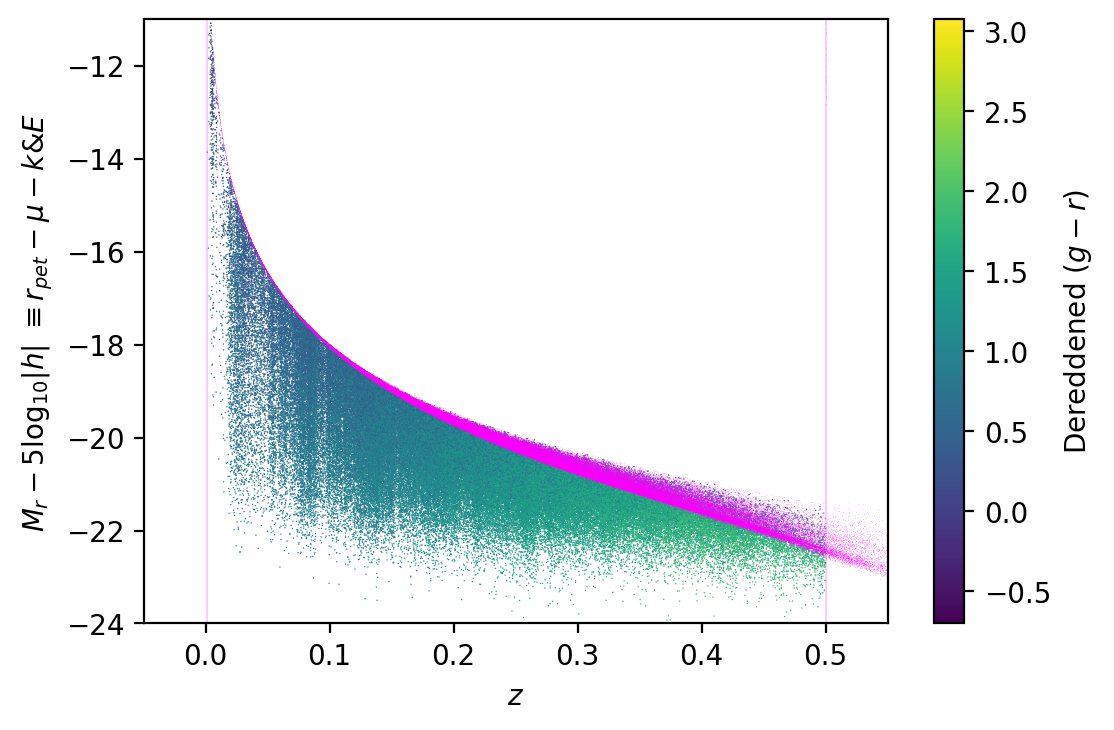

In [27]:
figure(figsize=(6, 4), dpi=200)

pl.scatter(bright['Z'],  derived['MRH'], marker='.', lw=0.0,  c=bright['GMR'], label='BGS OP', s=1)
pl.plot(derived['ZMAX'], derived['MRH'], marker=',', lw=0.0,  c='magenta', label='zmax loci', alpha=0.2) 

pl.xlabel('$z$')
pl.ylabel('$M_r - 5\log_{10}|h|$ $\equiv r_{pet} - \mu -k&E$ ')

pl.xlim(-0.05, 0.55)
pl.ylim( -24., -11.)

# pl.legend(frameon=False, loc=1)

pl.colorbar(label='Dereddened $(g-r)$')

pl.axvline(0.001, c='magenta', lw=0.15)
pl.axvline(0.500, c='magenta', lw=0.15)

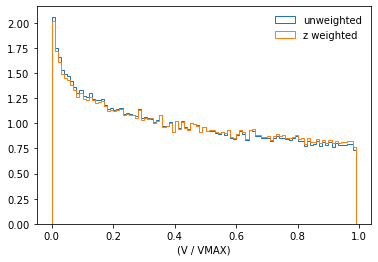

In [29]:
pl.hist(derived['VONVMAX'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', label='unweighted', density=True)
pl.hist(derived['VONVMAX'], weights=derived['BGS_Z_WEIGHT'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', label='z weighted', density=True)

pl.xlabel('(V / VMAX)')

pl.legend(frameon=False, loc=1)

# Done